In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)
from scipy import stats

In [2]:
from google.colab import files
files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


{'test.csv': b'Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition\n1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head , test.head

(<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0        1          60       RL         65.0     8450   Pave   NaN      Reg   
 1        2          20       RL         80.0     9600   Pave   NaN      Reg   
 2        3          60       RL         68.0    11250   Pave   NaN      IR1   
 3        4          70       RL         60.0     9550   Pave   NaN      IR1   
 4        5          60       RL         84.0    14260   Pave   NaN      IR1   
 5        6          50       RL         85.0    14115   Pave   NaN      IR1   
 6        7          20       RL         75.0    10084   Pave   NaN      Reg   
 7        8          60       RL          NaN    10382   Pave   NaN      IR1   
 8        9          50       RM         51.0     6120   Pave   NaN      Reg   
 9       10         190       RL         50.0     7420   Pave   NaN      Reg   
 10      11          20       RL         70.0    11200   Pave   NaN      Reg   
 11      1

In [5]:

train.shape, test.shape

((1460, 81), (1459, 80))

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
from google.colab import files
files.upload()

Saving data_description.txt to data_description.txt


{'data_description.txt': b"MSSubClass: Identifies the type of dwelling involved in the sale.\t\n\n        20\t1-STORY 1946 & NEWER ALL STYLES\n        30\t1-STORY 1945 & OLDER\n        40\t1-STORY W/FINISHED ATTIC ALL AGES\n        45\t1-1/2 STORY - UNFINISHED ALL AGES\n        50\t1-1/2 STORY FINISHED ALL AGES\n        60\t2-STORY 1946 & NEWER\n        70\t2-STORY 1945 & OLDER\n        75\t2-1/2 STORY ALL AGES\n        80\tSPLIT OR MULTI-LEVEL\n        85\tSPLIT FOYER\n        90\tDUPLEX - ALL STYLES AND AGES\n       120\t1-STORY PUD (Planned Unit Development) - 1946 & NEWER\n       150\t1-1/2 STORY PUD - ALL AGES\n       160\t2-STORY PUD - 1946 & NEWER\n       180\tPUD - MULTILEVEL - INCL SPLIT LEV/FOYER\n       190\t2 FAMILY CONVERSION - ALL STYLES AND AGES\n\nMSZoning: Identifies the general zoning classification of the sale.\n\t\t\n       A\tAgriculture\n       C\tCommercial\n       FV\tFloating Village Residential\n       I\tIndustrial\n       RH\tResidential High Density\n      

In [9]:
desc_file = open('data_description.txt')
print (desc_file.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [10]:
train.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [11]:
train.describe() , train.info

(                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
 count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
 mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
 std     421.610009    42.300571    24.284752    9981.264932     1.382997   
 min       1.000000    20.000000    21.000000    1300.000000     1.000000   
 25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
 50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
 75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
 max    1460.000000   190.000000   313.000000  215245.000000    10.000000   
 
        OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
 count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
 mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
 std       1.112799    30.202904     20.645407   181.066207   456.098091   
 

In [12]:
corr = train.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Text(0.5, 1.0, 'Correlation coefficients w.r.t. Sale Price')

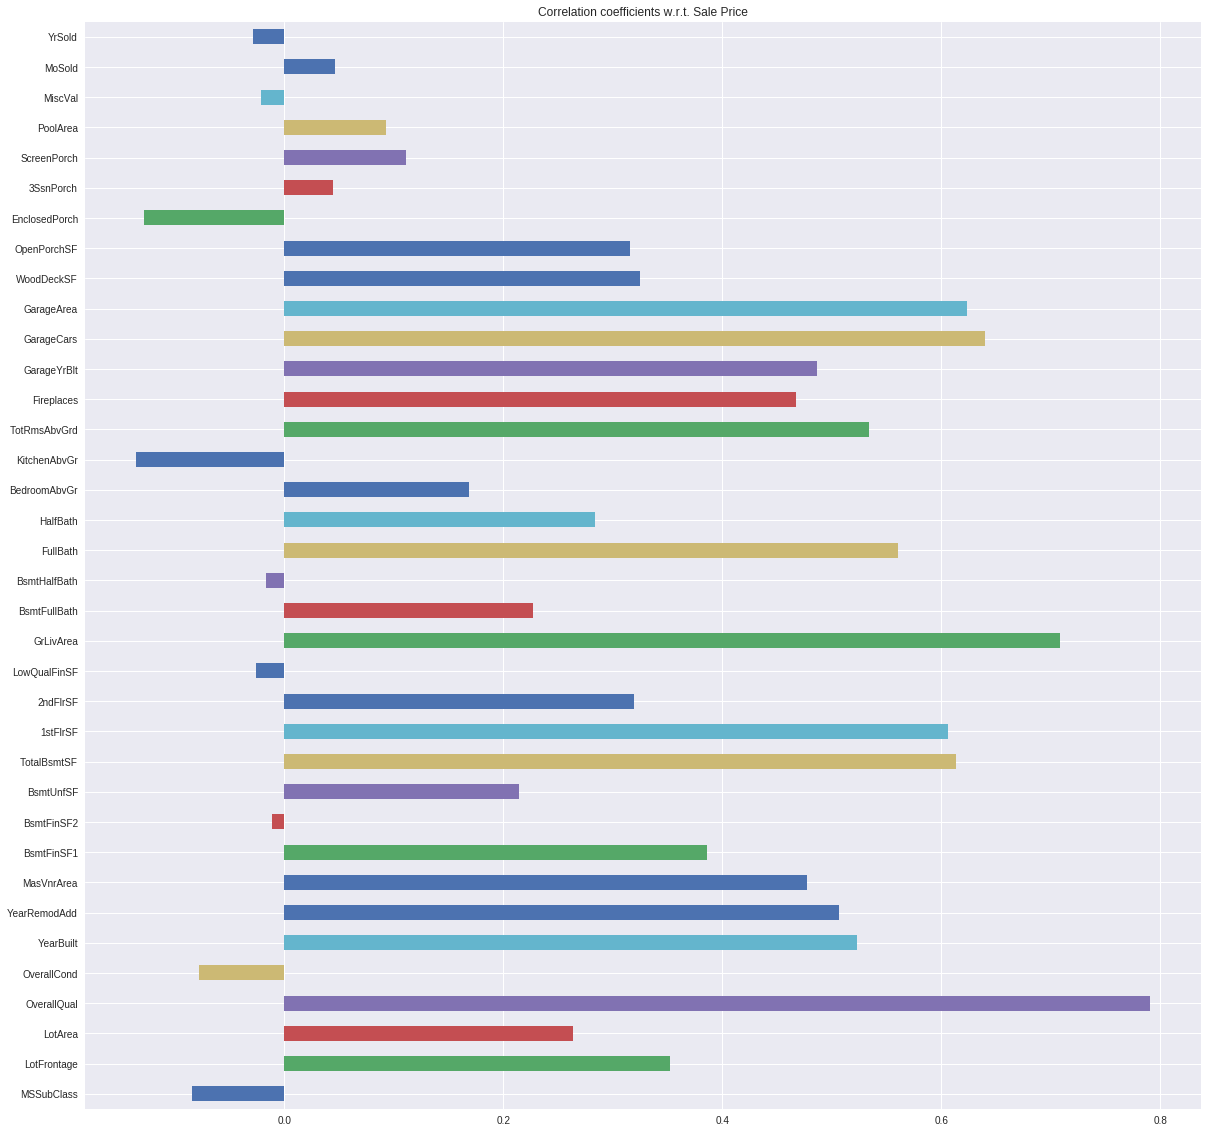

In [13]:
plt.figure(figsize=(20,20))
corr = corr[1:-1] # removing 1st (SalePrice) and last (Id) row from dataframe
corr.plot(kind='barh') # using pandas plot
plt.title('Correlation coefficients w.r.t. Sale Price')


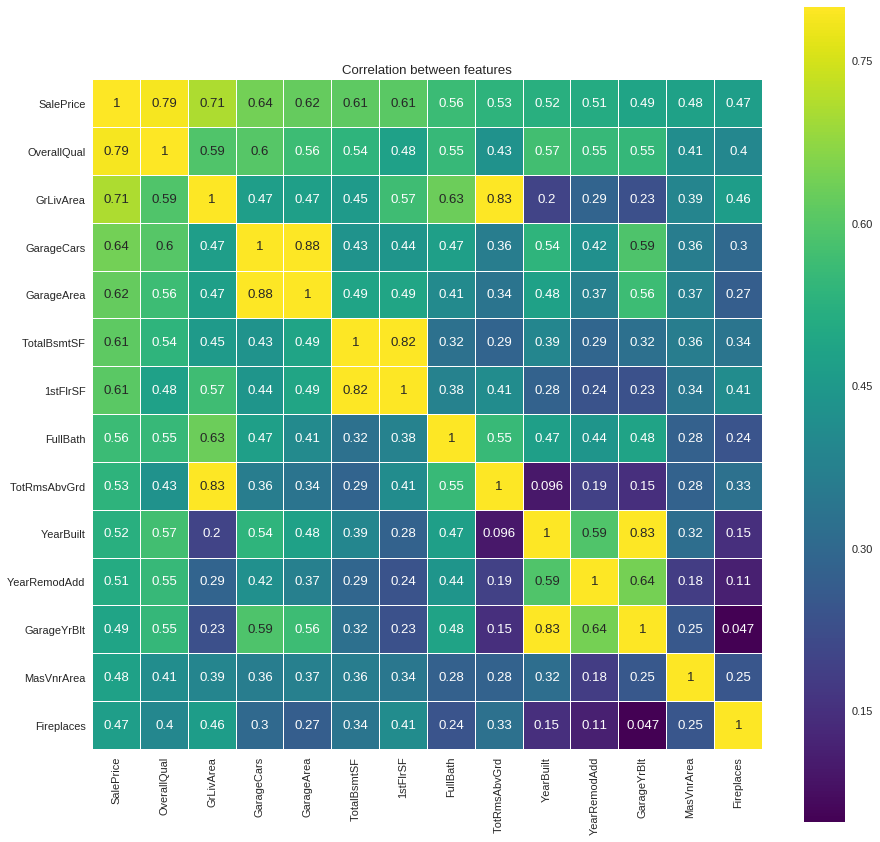

In [14]:
# taking high correlated variables having positive correlation of 45% and above
high_positive_correlated_variables = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', \
                               'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', \
                               'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces']

corrMatrix = train[high_positive_correlated_variables].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(15, 15))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True, annot=True, cmap='viridis', linecolor="white")

plt.title('Correlation between features');

In [15]:
feature_variable = 'OverallQual'
target_variable = 'SalePrice'
train[[feature_variable, target_variable]].groupby([feature_variable], as_index=False).mean().sort_values(by=feature_variable, ascending=False)

,OverallQual,SalePrice
9,10,438588.388889
8,9,367513.023256
7,8,274735.535714
6,7,207716.423197
5,6,161603.034759
4,5,133523.347607
3,4,108420.655172
2,3,87473.750000
1,2,51770.333333
0,1,50150.000000


In [16]:
feature_variable = 'GarageCars'
target_variable = 'SalePrice'
train[[feature_variable, target_variable]].groupby([feature_variable], as_index=False).mean().sort_values(by=feature_variable, ascending=False)

,GarageCars,SalePrice
4,4,192655.800000
3,3,309636.121547
2,2,183851.663835
1,1,128116.688347
0,0,103317.283951


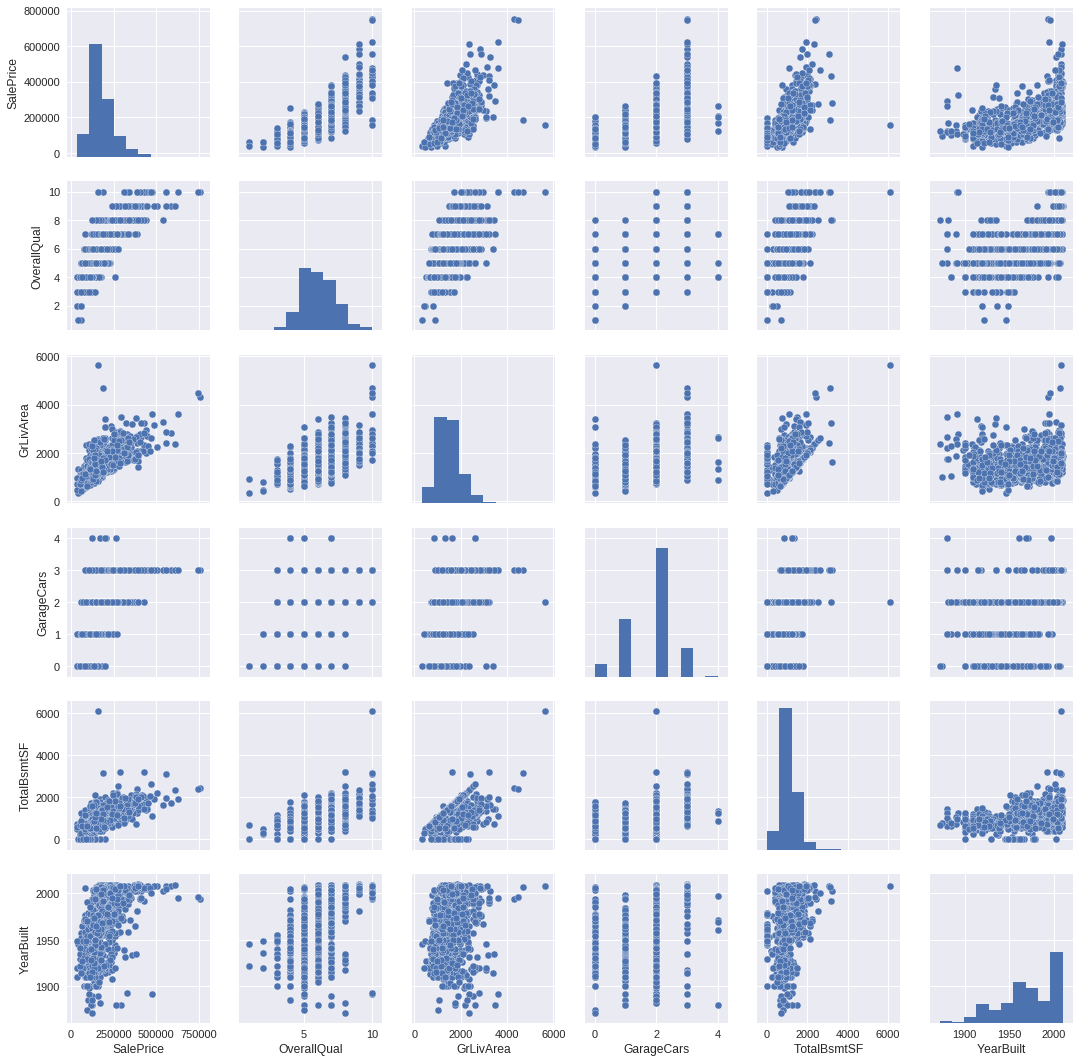

In [17]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


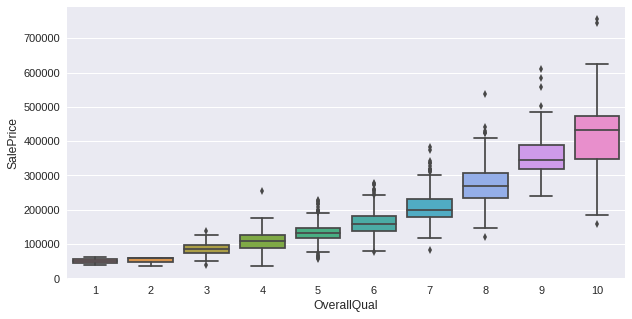

In [18]:
# box plot overallqual/saleprice
plt.figure(figsize=[10,5])
sns.boxplot(x='OverallQual', y="SalePrice", data=train)

In [19]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Number of Occurences')

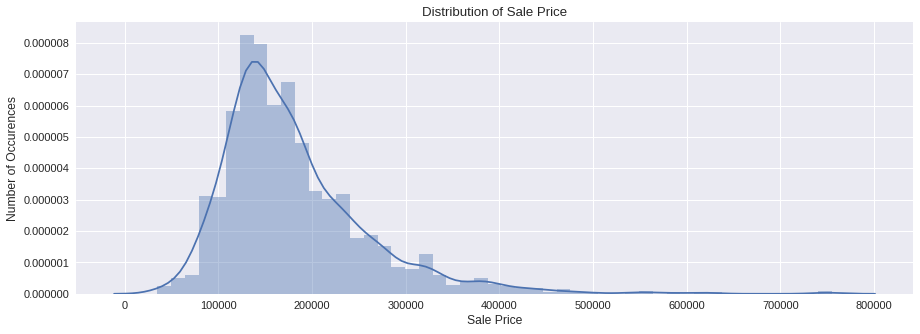

In [20]:
# histogram to graphically show skewness and kurtosis
plt.figure(figsize=[15,5])
sns.distplot(train['SalePrice'])
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Number of Occurences')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519414, 180921.19589041095, 0.9319665641512983))

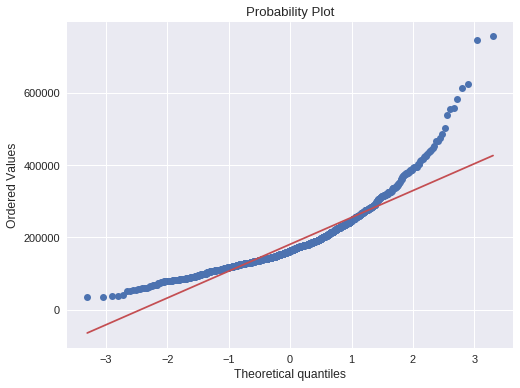

In [21]:
# normal probability plot
plt.figure(figsize=[8,6])
stats.probplot(train['SalePrice'], plot=plt)

In [22]:
# skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Text(0, 0.5, 'Number of Occurences')

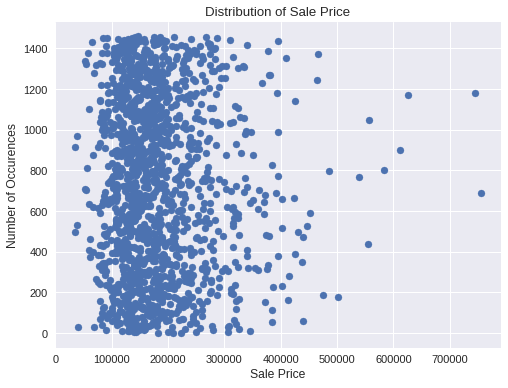

In [23]:
plt.figure(figsize=[8,6])
plt.scatter(train["SalePrice"].values, range(train.shape[0]))
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price");
plt.ylabel("Number of Occurences")

In [24]:
# removing outliers
upperlimit = np.percentile(train.SalePrice.values, 99.5)
train['SalePrice'].loc[train['SalePrice']>upperlimit] = upperlimit # slicing dataframe upto the uppperlimit

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Text(0, 0.5, 'Number of Occurences')

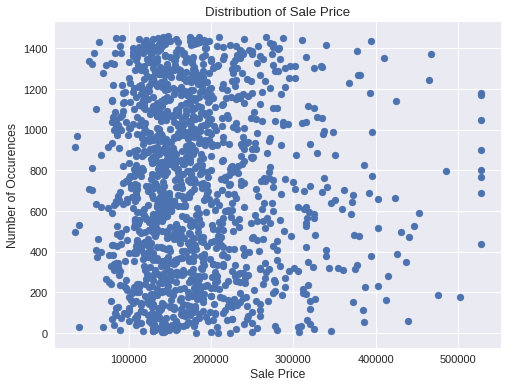

In [25]:
# plotting again the graph after removing outliers
plt.figure(figsize=[8,6])
plt.scatter(train["SalePrice"].values, range(train.shape[0]))
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price");
plt.ylabel("Number of Occurences")

In [0]:
# applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.17558545,
         13.17558545, 13.17558545])),
 (0.3956831776652712, 12.023196041130895, 0.9957775371441351))

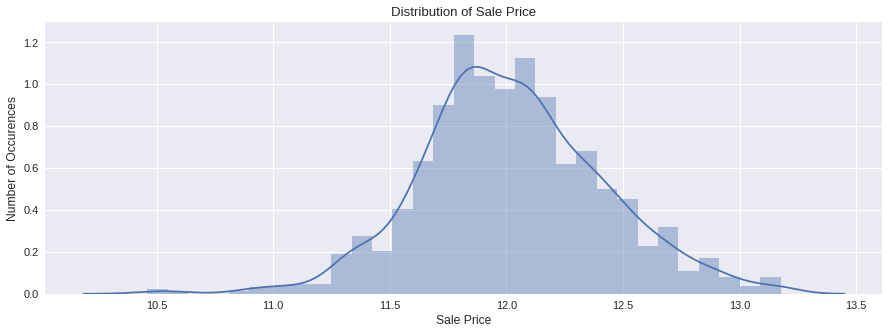

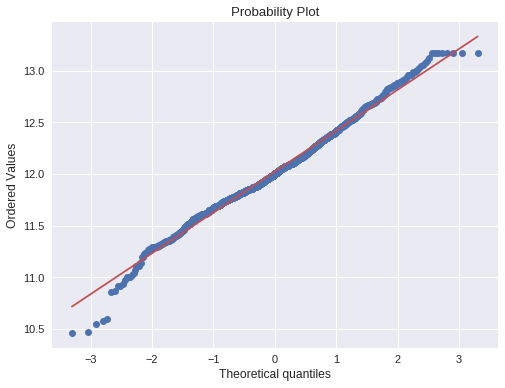

In [27]:
# histogram to graphically show skewness and kurtosis
plt.figure(figsize=[15,5])
sns.distplot(train['SalePrice'])
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Number of Occurences')

# normal probability plot
plt.figure(figsize=[8,6])
stats.probplot(train['SalePrice'], plot=plt)

In [28]:
# skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 0.062732
Kurtosis: 0.622026


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


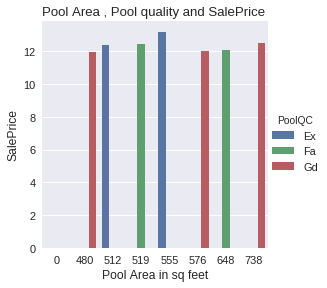

In [29]:
sns.factorplot(x="PoolArea",y="SalePrice",data=train,hue="PoolQC",kind='bar')
plt.title("Pool Area , Pool quality and SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Pool Area in sq feet");

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


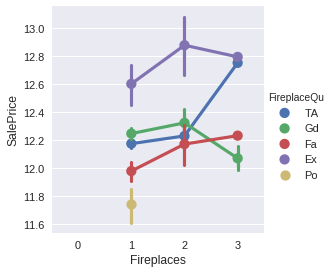

In [30]:
sns.factorplot("Fireplaces","SalePrice",data=train,hue="FireplaceQu");

In [31]:
pd.crosstab(train.Fireplaces, train.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,Po,TA
Fireplaces,,,,,
1,19,28,324,20,259
2,4,4,54,0,53
3,1,1,2,0,1


Text(0, 0.5, 'SalePrice')

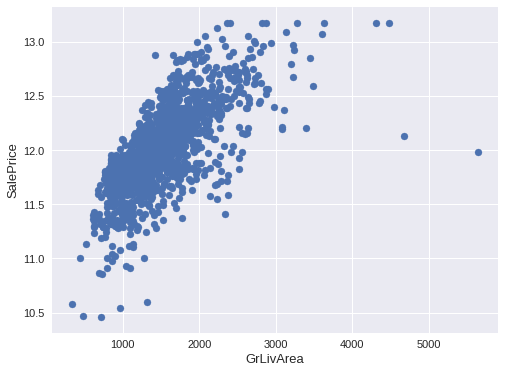

In [32]:
# scatter plot grlivarea/saleprice
plt.figure(figsize=[8,6])
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.xlabel('GrLivArea', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)

In [0]:
# Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

Text(0, 0.5, 'SalePrice')

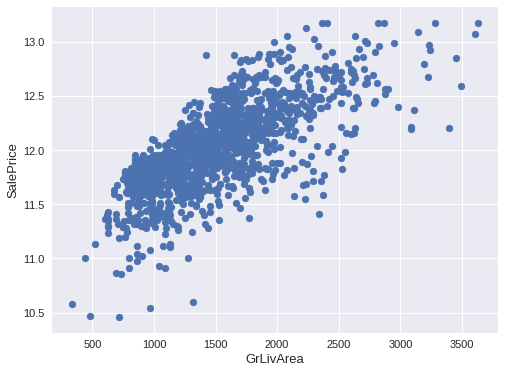

In [34]:
# Plot the graph again

# scatter plot grlivarea/saleprice
plt.figure(figsize=[8,6])
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.xlabel('GrLivArea', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)

In [35]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.shape

(2915, 80)

In [36]:
null_columns = all_data.columns[all_data.isnull().any()]
total_null_columns = all_data[null_columns].isnull().sum()
percent_null_columns = ( all_data[null_columns].isnull().sum() / all_data[null_columns].isnull().count() )
missing_data = pd.concat([total_null_columns, percent_null_columns], axis=1, keys=['Total', 'Percent']).sort_values(by=['Percent'], ascending=False)
#missing_data.head()
missing_data

,Total,Percent
PoolQC,2907,0.997256
MiscFeature,2810,0.963979
Alley,2717,0.932075
Fence,2345,0.804460
FireplaceQu,1420,0.487136
LotFrontage,486,0.166724
GarageCond,159,0.054545
GarageQual,159,0.054545
GarageYrBlt,159,0.054545
GarageFinish,159,0.054545


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Percent missing data by feature')

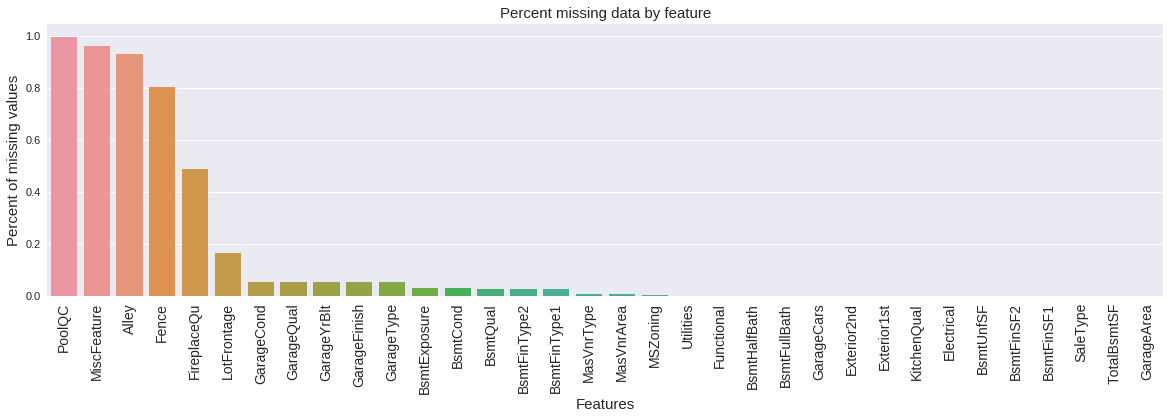

In [37]:
plt.figure(figsize=[20,5])
plt.xticks(rotation='90', fontsize=14)
sns.barplot(x=missing_data.index, y=missing_data.Percent)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [38]:
# get unique values of the column data
all_data['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [0]:
# replace null values with 'None'
all_data['PoolQC'].fillna('None', inplace=True)

In [41]:
# get unique values of the column data
all_data['PoolQC'].unique()

array(['None', 'Ex', 'Fa', 'Gd'], dtype=object)

In [42]:

# get unique values of the column data
all_data['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [0]:
# replace null values with 'None'
all_data['MiscFeature'].fillna('None', inplace=True)

In [44]:
# get unique values of the column data
all_data['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [0]:
# replace null values with 'None'
all_data['Alley'].fillna('None', inplace=True)

In [46]:
# get unique values of the column data
all_data['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [0]:
all_data['Fence'].fillna('None', inplace=True)


In [48]:
# get unique values of the column data
all_data['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [0]:
# replace null values with 'None'
all_data['FireplaceQu'].fillna('None', inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

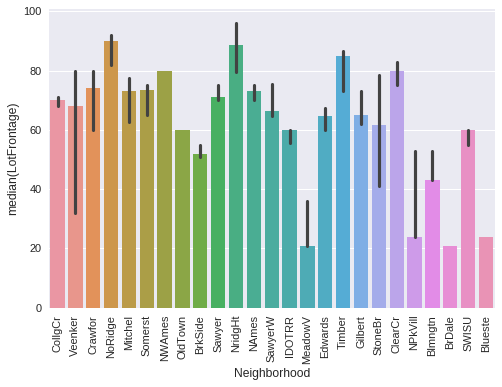

In [50]:
# barplot of median of LotFrontage with respect to Neighborhood
sns.barplot(data=train,x='Neighborhood',y='LotFrontage', estimator=np.median)
plt.xticks(rotation=90)

In [51]:
# get unique values of the column data
all_data['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106.,  42.,  39., 104., 144.,
       114., 128., 149., 313., 168., 182., 138., 152., 124., 153.,  46.,
        26.,  25., 119.,  31.,  28., 117., 113., 125., 135., 136.,  22.,
       123., 160., 195., 155., 126., 200., 131., 133.])

In [0]:

# replace null values with median LotFrontage of all the Neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [53]:
all_data['LotFrontage'].unique()

array([ 65. ,  80. ,  68. ,  60. ,  84. ,  85. ,  75. ,  51. ,  50. ,
        70. ,  72. ,  91. ,  73. ,  66. , 101. ,  57. ,  44. , 110. ,
        98. ,  47. , 108. , 112. ,  74. , 115. ,  67. ,  61. ,  48. ,
        33. ,  64. ,  52. , 100. ,  24. ,  89. ,  63. ,  76. ,  81. ,
        95. ,  69. ,  21. ,  32. ,  78. , 121. , 122. ,  40. , 105. ,
        77. ,  94. ,  34. ,  90. ,  80.5,  55. ,  88. ,  82. ,  71. ,
       120. , 107. ,  92. , 134. ,  62. ,  86. , 141. ,  97. ,  72.5,
        54. ,  41. ,  79. , 174. ,  99. ,  83. ,  43. , 103. ,  93. ,
        30. ,  64.5, 129. , 140. ,  35. ,  37. , 118. ,  87. , 116. ,
       150. , 111. ,  49. ,  96. ,  59. ,  36. ,  56. , 102. ,  58. ,
        38. , 109. , 130. ,  53. , 137. ,  88.5,  45. , 106. ,  42. ,
        39. , 104. , 144. , 114. , 128. , 149. , 313. , 168. , 182. ,
       138. , 152. , 124. , 153. ,  46. ,  26. ,  25. , 119. ,  31. ,
        28. , 117. , 113. , 125. , 135. , 136. ,  22. , 123. , 160. ,
       195. , 155. ,

In [54]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    print (all_data[col].unique())

['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
['RFn' 'Unf' 'Fin' nan]
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [0]:
# replace null values with 'None'
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col].fillna('None', inplace=True)

In [56]:
# get unique values of the column data
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    print (all_data[col].unique())

[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933. 1917. 1896. 1895. 2207. 1943. 1919.]
[ 548.  460.  608.  642.  836.  480.  636.  484.  468.  205.  384.  736.
  352.  840.  576.  516.  294.  853.  280.  534.  572.  270.  890.  772.
  319.  240.  250.  271.  447.  556.  691.  672.  498.  246.    0.  440.
  308.  504.  300.  670.  826.  386.  388.  528.  894.  565.  641.  288.
  645.  852.  558.  220.  667.  360.  427.  490.  379.  297.  283.  509.
 

In [0]:
# replace null values with 0
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col].fillna(0, inplace=True)

In [58]:
# get unique values of the column data
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    print (all_data[col].unique())

['Gd' 'TA' 'Ex' nan 'Fa']
['TA' 'Gd' nan 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' nan]
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


In [0]:
# replace null values with 'None'
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col].fillna('None', inplace=True)

In [0]:
# replace null values with 0
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col].fillna(0, inplace=True)

In [0]:

all_data["MasVnrType"].fillna("None", inplace=True)
all_data["MasVnrArea"].fillna(0, inplace=True)

In [0]:
for col in ('MSZoning', 'Utilities', 'Functional', 'Exterior2nd', 'Exterior1st', 'KitchenQual', 'Electrical', 'SaleType'):
    all_data[col].fillna(all_data[col].mode()[0], inplace=True)

In [63]:
null_columns = all_data.columns[all_data.isnull().any()]
print (null_columns)

Index([], dtype='object')


In [64]:
numeric_features = all_data.dtypes[all_data.dtypes != 'object'].index
#print (numeric_features)

skewness = []
for col in numeric_features:
    skewness.append( (col, all_data[col].skew()) )
    
pd.DataFrame(skewness, columns=('Feature', 'Skewness')).sort_values(by='Skewness', ascending=False)

,Feature,Skewness
24,MiscVal,21.943440
29,PoolArea,18.711459
19,LotArea,13.130516
21,LowQualFinSF,12.086535
2,3SsnPorch,11.373947
18,KitchenAbvGr,4.301059
5,BsmtFinSF2,4.144996
9,EnclosedPorch,4.002856
30,ScreenPorch,3.945539
7,BsmtHalfBath,3.944922


In [65]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [66]:
positively_skewed_features = all_data[numeric_features].columns[abs(all_data[numeric_features].skew()) > 1]
#print (positively_skewed_features)

# applying log transformation
for col in positively_skewed_features:
    all_data[col] = np.log(np.ma.array(all_data[col], mask=(all_data[col]<=0))) # using masked array to ignore log transformation of 0 values as (log 0) is undefined

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


In [67]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,6.752270,854,1.0,None,3,1Fam,TA,No,706.0,1.0,...,WD,1.0,Pave,8,856.0,AllPub,1.000000,2003,2003,2008
1,7.140453,0,1.0,None,3,1Fam,TA,Gd,978.0,1.0,...,WD,1.0,Pave,6,1262.0,AllPub,5.697093,1976,1976,2007
2,6.824374,866,1.0,None,3,1Fam,TA,Mn,486.0,1.0,...,WD,1.0,Pave,6,920.0,AllPub,1.000000,2001,2002,2008
3,6.867974,756,1.0,None,3,1Fam,Gd,No,216.0,1.0,...,WD,1.0,Pave,7,756.0,AllPub,1.000000,1915,1970,2006
4,7.043160,1053,1.0,None,4,1Fam,TA,Av,655.0,1.0,...,WD,1.0,Pave,9,1145.0,AllPub,5.257495,2000,2000,2008


In [68]:
%%HTML
<style>
  table {margin-left: 0 !important;}
</style>

In [69]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2915, 302)


In [0]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [71]:
train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,6.752270,854,1.0,3,706.0,1.0,1.0,1.0,150.0,1.000000,...,0,0,0,0,0,1,0,1,1,0
1,7.140453,0,1.0,3,978.0,1.0,0.0,0.0,284.0,1.000000,...,0,0,0,0,0,1,0,1,1,0
2,6.824374,866,1.0,3,486.0,1.0,1.0,1.0,434.0,1.000000,...,0,0,0,0,0,1,0,1,1,0
3,6.867974,756,1.0,3,216.0,1.0,1.0,1.0,540.0,5.605802,...,0,0,0,0,0,1,0,1,1,0
4,7.043160,1053,1.0,4,655.0,1.0,1.0,1.0,490.0,1.000000,...,0,0,0,0,0,1,0,1,1,0


In [72]:
test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
1456,6.797940,0,1.0,2,468.0,4.969813,0.0,1.0,270.0,1.0,...,0,0,0,0,0,1,0,1,1,0
1457,7.192182,0,1.0,3,923.0,1.000000,0.0,1.0,406.0,1.0,...,0,0,0,0,0,1,0,1,1,0
1458,6.833032,701,1.0,3,791.0,1.000000,0.0,1.0,137.0,1.0,...,0,0,0,0,0,1,0,1,1,0
1459,6.830874,678,1.0,3,602.0,1.000000,0.0,1.0,324.0,1.0,...,0,0,0,0,0,1,0,1,1,0
1460,7.154615,0,1.0,2,263.0,1.000000,0.0,1.0,1017.0,1.0,...,0,0,0,0,0,1,0,1,1,0


In [0]:
# importing model libraries
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [0]:
X_train = train.drop(['Id'], axis=1)
# y_train has been defined above where we combined train and test data to create all_data
X_test = test.drop(['Id'], axis=1)

In [75]:
#lasso = Lasso(alpha =0.0005, random_state=1)
#lasso = Lasso()
model_lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005))
# y_train is defined above where we combined train and test data to create all_data
# np.sqrt() function is used to create square root of MSE returned by cross_val_score function
cv_score = np.sqrt( -cross_val_score(model_lasso, X_train, y_train, scoring="neg_mean_squared_error", cv=5) )
print (cv_score)
print ("SCORE (mean: %f , std: %f)" % (np.mean(cv_score), np.std(cv_score)))

[0.10605609 0.11134129 0.11972374 0.10013615 0.10878121]
SCORE (mean: 0.109208 , std: 0.006443)


In [76]:
model_elastic_net = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005))
# y_train is defined above where we combined train and test data to create all_data
# np.sqrt() function is used to create square root of MSE returned by cross_val_score function
cv_score = np.sqrt( -cross_val_score(model_elastic_net, X_train, y_train, scoring="neg_mean_squared_error", cv=5) )
print (cv_score)
print ("SCORE (mean: %f , std: %f)" % (np.mean(cv_score), np.std(cv_score)))

[0.10609503 0.11304797 0.12187797 0.10023517 0.11022137]
SCORE (mean: 0.110296 , std: 0.007219)


In [77]:
model_kernel_ridge = KernelRidge(alpha=0.6)
# y_train is defined above where we combined train and test data to create all_data
# np.sqrt() function is used to create square root of MSE returned by cross_val_score function
cv_score = np.sqrt( -cross_val_score(model_kernel_ridge, X_train, y_train, scoring="neg_mean_squared_error", cv=5) )
print (cv_score)
print ("SCORE (mean: %f , std: %f)" % (np.mean(cv_score), np.std(cv_score)))

[0.11446845 0.12290099 0.12999277 0.10554084 0.11596478]
SCORE (mean: 0.117774 , std: 0.008239)


In [78]:

model_gboost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state=5)

# y_train is defined above where we combined train and test data to create all_data
# np.sqrt() function is used to create square root of MSE returned by cross_val_score function
cv_score = np.sqrt( -cross_val_score(model_gboost, X_train, y_train, scoring="neg_mean_squared_error", cv=5) )
print (cv_score)
print ("SCORE (mean: %f , std: %f)" % (np.mean(cv_score), np.std(cv_score)))

[0.10907178 0.12793438 0.12617214 0.10566995 0.11093312]
SCORE (mean: 0.115956 , std: 0.009233)


In [79]:
model_xgboost = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=True, nthread = -1)

# y_train is defined above where we combined train and test data to create all_data
# np.sqrt() function is used to create square root of MSE returned by cross_val_score function
cv_score = np.sqrt( -cross_val_score(model_xgboost, X_train, y_train, scoring="neg_mean_squared_error", cv=5) )
print (cv_score)
print ("SCORE (mean: %f , std: %f)" % (np.mean(cv_score), np.std(cv_score)))

[0.11000416 0.12198316 0.12266225 0.10937407 0.11400169]
SCORE (mean: 0.115605 , std: 0.005714)


In [80]:
model_lgbm = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

# y_train is defined above where we combined train and test data to create all_data
# np.sqrt() function is used to create square root of MSE returned by cross_val_score function
cv_score = np.sqrt( -cross_val_score(model_lgbm, X_train, y_train, scoring="neg_mean_squared_error", cv=5) )
print (cv_score)
print ("SCORE (mean: %f , std: %f)" % (np.mean(cv_score), np.std(cv_score)))

[0.11073185 0.12412674 0.12058732 0.10910135 0.11351934]
SCORE (mean: 0.115613 , std: 0.005794)


In [81]:
model_lasso.fit(X_train, y_train)
model_elastic_net.fit(X_train, y_train)
model_kernel_ridge.fit(X_train, y_train)
model_gboost.fit(X_train, y_train)
model_xgboost.fit(X_train, y_train)
model_lgbm.fit(X_train, y_train)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.2319, feature_fraction_seed=9,
       importance_type='split', learning_rate=0.05, max_bin=55,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_data_in_leaf=6, min_split_gain=0.0, min_sum_hessian_in_leaf=11,
       n_estimators=720, n_jobs=-1, num_leaves=5, objective='regression',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [82]:
dict_models = {'lasso':model_lasso, 'elastic_net':model_elastic_net, 'kernel_ridge':model_kernel_ridge, 
            'gboost':model_gboost, 'xgboost':model_xgboost, 'lgbm':model_lgbm}

for key, value in dict_models.items():
    pred_train = value.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, pred_train))
    print ("%s: %f" % (key, rmse))

lasso: 0.098365
elastic_net: 0.094859
kernel_ridge: 0.089563
gboost: 0.051333
xgboost: 0.078901
lgbm: 0.072435


In [0]:
prediction_lasso = np.expm1(model_lasso.predict(X_test))
prediction_elastic_net = np.expm1(model_elastic_net.predict(X_test))
prediction_kernel_ridge = np.expm1(model_kernel_ridge.predict(X_test))
prediction_gboost = np.expm1(model_gboost.predict(X_test))

prediction_xgboost = np.expm1(model_xgboost.predict(X_test))
prediction_lgbm = np.expm1(model_lgbm.predict(X_test))

In [0]:
# kaggle score: 0.12346
#prediction = prediction_gboost

# kaggle score: 0.12053
#prediction = (prediction_lasso + prediction_xgboost) / float(2) 

# kaggle score: 0.11960
#prediction = prediction_lasso 

# kaggle score: 0.11937
prediction = (prediction_lasso + prediction_elastic_net) / float(2) 

#print prediction

In [0]:
submission = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": prediction
    })

submission.to_csv('submission.csv', index=False)

In [0]:
final=pd.read_csv('submission.csv')

In [87]:
final

,Id,SalePrice
0,1461,121456.584965
1,1462,155485.105801
2,1463,183780.681101
3,1464,200284.471794
4,1465,194492.670777
5,1466,170442.464670
6,1467,177816.099226
7,1468,160883.094928
8,1469,194550.551400
9,1470,117728.916888
